# Naive Bayes classifiers on Weather dataset

Naive Bayes classification is a probabilistic approach for classification. It is based on Bayes Theorem. Naive Bayes classification uses any of the probability distributions, Gaussian distribution, Multinomial Distribution, Bernoulli distribution.


## 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Prepare the Dataset

The dataset is based on the following.
![title](images/weather-dataset.JPG)

In [2]:
# Convert the above data into Python lists. The ordering in the above data is followed.

Outlook = ['sunny' ,'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
           'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy']

Temp = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool',
       'mild','mild','mild','hot','mild']

Humidity = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high',
           'normal','normal','normal' , 'high', 'normal', 'high']

Windy = ['false' ,'true' ,'false' ,'false' ,'false' ,'true' ,'true' ,'false' ,
         'false' ,'false' ,'true' ,'true' ,'false' ,'true' ]
         
Play = ['no','no','yes','yes','yes','no','yes','no',
        'yes','yes','yes','yes','yes','no']


In [3]:
# create a dataframe from the above lists.

weatherdata = pd.DataFrame(
    {'Outlook': Outlook,
     'Temp': Temp,
     'Humidity': Humidity,
     'Windy': Windy,
     'Play': Play
    })
print(weatherdata.head())

    Outlook  Temp Humidity  Windy Play
0     sunny   hot     high  false   no
1     sunny   hot     high   true   no
2  overcast   hot     high  false  yes
3     rainy  mild     high  false  yes
4     rainy  cool   normal  false  yes


In [4]:
# Encode the list as 0,1,2,...

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# apply the label encoder for each list
outlook = le.fit_transform(Outlook)      # 2,2,0,1,1
temp = le.fit_transform(Temp)            # 1,1,1,2,0
humidity = le.fit_transform(Humidity)    # 0,0,0,0,1
windy = le.fit_transform(Windy)          # 0,1,0,0,0
play = le.fit_transform(Play)            # 0,0,1,1,1


# create a dataframe from the encoded lists.
weatherFeatures = pd.DataFrame(
    {'outlook': outlook,
     'temp': temp,
     'humidity': humidity,
     'windy': windy,
    })
print(weatherFeatures.head())

print('Play = ', play)

   outlook  temp  humidity  windy
0        2     1         0      0
1        2     1         0      1
2        0     1         0      0
3        1     2         0      0
4        1     0         1      0
Play =  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## Visualize the dataset

In [5]:
data2d = weatherFeatures.loc[:,['outlook','windy']]

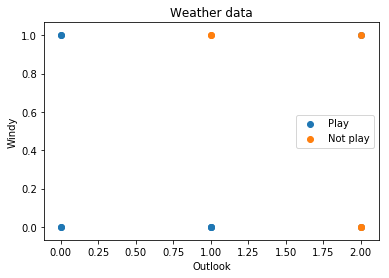

In [6]:
pos = data2d.loc[play == 1]
neg = data2d.loc[play == 0]

plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Play')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1],  label='Not play')

plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.title('Weather data')
plt.legend()
plt.show()



## 3. Build the classifier  
## 4. Make predictions for new Data

In [7]:
from sklearn.naive_bayes import GaussianNB

# create an object of the GaussianNB classifier
gnb_classifier = GaussianNB()

# train the classifier
gnb_classifier.fit(weatherFeatures, play)


# predict for training data
predicted= gnb_classifier.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)

# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= gnb_classifier.predict([[0,2,1,1]]) 
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 1 1 1 1 0 1 1 1 1 1 0]
Predicted Value for new data: [1]


In [8]:
from sklearn.naive_bayes import BernoulliNB

# create an object of the GaussianNB classifier
bnb = BernoulliNB()

# train the classifier
bnb.fit(weatherFeatures, play)


# predict for training data
predicted= bnb.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)


# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= bnb.predict([[0,2,1,1]])
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 0 1 1 1 0 1 1 1 1 1 0]
Predicted Value for new data: [1]


In [9]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# train the classifier
mnb.fit(weatherFeatures, play)


# predict for training data
predicted= mnb.predict(weatherFeatures)
print("Predicted Value for training data:", predicted)


# predict for new data # 0:overcast, 2:mild, 1:normal, 1:true
y= mnb.predict([[0,2,1,1]]) 
print("Predicted Value for new data:", y)


Predicted Value for training data: [0 0 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted Value for new data: [1]


## 5. Performance Measures

In [10]:
# display the accuracy

print('GaussianNB = ', gnb_classifier.score(weatherFeatures, play)*100 )

print('BernoulliNB = ', bnb.score(weatherFeatures, play)*100 )

print('MultinomialNB = ', mnb.score(weatherFeatures, play)*100 )

GaussianNB =  92.85714285714286
BernoulliNB =  85.71428571428571
MultinomialNB =  78.57142857142857


## 6. Visualize the decision boundary

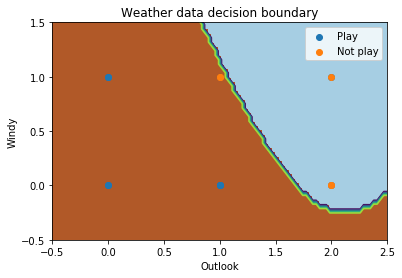

In [11]:
# Visualize  the classifier

# get min of X
x_min, x_max = data2d.iloc[:, 0].min() - .5, data2d.iloc[:, 0].max() + .5

# create a meshgrid
xx, yy  = np.meshgrid(np.linspace(x_min, x_max, num=100), np.linspace(x_min, x_max+1, num=100))

gnb = GaussianNB()
gnb.fit(data2d,play)

# predict for the meshgrid
z = gnb.predict( np.c_[xx.ravel(), yy.ravel()] )
z = z.reshape(xx.shape)

# plot the meshgrid
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

# plot decision boundary
plt.contour(xx, yy, z)

# plot the dataset
plt.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Play')
plt.scatter(neg.iloc[:, 0], neg.iloc[:, 1],  label='Not play')

plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.xticks(np.arange(-0.5, 2.6, step=0.5))
plt.yticks(np.arange(-0.5, 2.6, step=0.5))
plt.ylim(-0.5,2.5)
plt.ylim(-0.5,1.5)
plt.title('Weather data decision boundary')
plt.legend()
plt.show()